### 데이터 크롤링(스크래핑)
- 다음 사이트


- 로또를 1회차 ~ 최신회차까지 당첨번호 스크래핑
 - 로또 1회차 검색 -> 당첨번호 2회차 검색 -> 당첨번호 이런식으로 데이터 자동화
 스크래핑 프로그램 구현

- 필요한 기술 : 페이지 요청 라이브러리 , Python으로 HTML을 다루는 라이브러리 , pandas (데이터 정렬) , time(천천히 가져와야함)

In [1]:
from bs4 import BeautifulSoup # Python으로 HTML을 다루는 기능
import requests # 페이지 요청 라이브러리
import pandas as pd
import time

In [2]:
url = requests.get('https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&q=%EB%A1%9C%EB%98%90') # 1번만 실행하는 것이 좋다.

In [3]:
# 200 : 정상(충돌 X) , 400번대 : 존재하지않는 페이지, 삭제된 페이지
# 500번대 : 제한된 페이지
url

<Response [200]>

In [4]:
url.text # 가져온 정보 확인 , 밑에 결과는 html을 문자열로 가져온것이라서 파이썬이 알아 볼 수 있게 BeautifulSoup을 사용하여 바꿔줘야함

'<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="로또 &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=tot&amp;DA=YZR&amp;t__nil_searchbox=btn&amp;q=%EB%A1%9C%EB%98%90" />\n<meta property="og:description" content="Daum 검색에서 로또에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search_20240403.png" />\n<meta property="og:site_name" content="다음검색" />\n<title>로또 &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="Daum">\n<link rel="s

In [6]:
html = BeautifulSoup(url.text)
current=int(html.find('span',class_='f_red').text[:-1]) #class가 함수라서 _ (언더바 까지 넣어야한다.) .text까지 사용하면 text를 가져올 수 있다. 1123해 -> 1123으로 하기위해 text[:-1]

current

1139

In [7]:
html = BeautifulSoup(url.text)
# <span class="ball bg_ball1">5</span>
current=int(html.find('span',class_='ball bg_ball1').text[:]) #class가 함수라서 _ (언더바 까지 넣어야한다.) .text까지 사용하면 text를 가져올 수 있다.

current

5

In [ ]:
<div class="lottonum"> <span class="ball bg_ball1">5</span> <span class="ball bg_ball2">12</span> <span class="ball bg_ball2">15</span> <span class="ball bg_ball3">30</span> <span class="ball bg_ball4">37</span> <span class="ball bg_ball4">40</span> <span class="ball txt_bonus"> <span class="screen_out">보너스</span> </span> <span class="ball bg_ball2">18</span> </div>

In [9]:
numbers = html.find('div',class_='lottonum').find_all('span')

numbers

[<span class="ball bg_ball1">5</span>,
 <span class="ball bg_ball2">12</span>,
 <span class="ball bg_ball2">15</span>,
 <span class="ball bg_ball3">30</span>,
 <span class="ball bg_ball4">37</span>,
 <span class="ball bg_ball4">40</span>,
 <span class="ball txt_bonus"> <span class="screen_out">보너스</span> </span>,
 <span class="screen_out">보너스</span>,
 <span class="ball bg_ball2">18</span>]

In [10]:
numbers = html.find('div',class_='lottonum').find_all('span')
del numbers[-3:-1]
numbers

[<span class="ball bg_ball1">5</span>,
 <span class="ball bg_ball2">12</span>,
 <span class="ball bg_ball2">15</span>,
 <span class="ball bg_ball3">30</span>,
 <span class="ball bg_ball4">37</span>,
 <span class="ball bg_ball4">40</span>,
 <span class="ball bg_ball2">18</span>]

In [12]:
box = []
for i in numbers:
    box.append(int(i.text))

box

[5, 12, 15, 30, 37, 40, 18]

In [13]:
def make_numbers(html):
    numbers = html.find('div',class_='lottonum').find_all('span')
    del numbers[-3:-1]

    box = []
    for i in numbers:
        box.append(int(i.text))

    return box

In [14]:
make_numbers(html)

[5, 12, 15, 30, 37, 40, 18]

#### 자동화

In [20]:
import random
from bs4 import BeautifulSoup

total = []
for n in range(1,21):
    # 너무 빠르게 실행하면 웹페이지에서 차단 당할 수도 있기에 time 함수를 사용한다.
    url = requests.get(f"https://search.daum.net/search?w=tot&rtmaxcoll=LOT&DA=LOT&q={n}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8")
    html = BeautifulSoup(url.text)
    numbers = make_numbers(html)
    total.append(numbers)
    time.sleep(random.random()+1) # 0.x초 + 1초 만큼 멈춰 # 규칙적으로 가져오면 차단 당함
    print(f"{n}회 로또 데이터 수집 완료 : {numbers}")

1회 로또 데이터 수집 완료 : [10, 23, 29, 33, 37, 40, 16]
2회 로또 데이터 수집 완료 : [9, 13, 21, 25, 32, 42, 2]
3회 로또 데이터 수집 완료 : [11, 16, 19, 21, 27, 31, 30]
4회 로또 데이터 수집 완료 : [14, 27, 30, 31, 40, 42, 2]
5회 로또 데이터 수집 완료 : [16, 24, 29, 40, 41, 42, 3]
6회 로또 데이터 수집 완료 : [14, 15, 26, 27, 40, 42, 34]
7회 로또 데이터 수집 완료 : [2, 9, 16, 25, 26, 40, 42]
8회 로또 데이터 수집 완료 : [8, 19, 25, 34, 37, 39, 9]
9회 로또 데이터 수집 완료 : [2, 4, 16, 17, 36, 39, 14]
10회 로또 데이터 수집 완료 : [9, 25, 30, 33, 41, 44, 6]
11회 로또 데이터 수집 완료 : [1, 7, 36, 37, 41, 42, 14]
12회 로또 데이터 수집 완료 : [2, 11, 21, 25, 39, 45, 44]
13회 로또 데이터 수집 완료 : [22, 23, 25, 37, 38, 42, 26]
14회 로또 데이터 수집 완료 : [2, 6, 12, 31, 33, 40, 15]
15회 로또 데이터 수집 완료 : [3, 4, 16, 30, 31, 37, 13]
16회 로또 데이터 수집 완료 : [6, 7, 24, 37, 38, 40, 33]
17회 로또 데이터 수집 완료 : [3, 4, 9, 17, 32, 37, 1]
18회 로또 데이터 수집 완료 : [3, 12, 13, 19, 32, 35, 29]
19회 로또 데이터 수집 완료 : [6, 30, 38, 39, 40, 43, 26]
20회 로또 데이터 수집 완료 : [10, 14, 18, 20, 23, 30, 41]


In [15]:
import random
random.random()

0.046244338247313554

In [22]:
lotto = pd.DataFrame(total, columns=['1번째','2번째','3번째','4번째','5번째','6번째','보너스'])
lotto.to_excel('lotto.xlsx',index=False)
lotto

,1번째,2번째,3번째,4번째,5번째,6번째,보너스
0,10,23,29,33,37,40,16
1,9,13,21,25,32,42,2
2,11,16,19,21,27,31,30
3,14,27,30,31,40,42,2
4,16,24,29,40,41,42,3
5,14,15,26,27,40,42,34
6,2,9,16,25,26,40,42
7,8,19,25,34,37,39,9
8,2,4,16,17,36,39,14
9,9,25,30,33,41,44,6


#### 연금 복권 720 +  실습

In [23]:
url = requests.get('https://search.daum.net/search?w=tot&DA=JIM&rtmaxcoll=JIM&&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C%20720%2B%20218%ED%9A%8C%EC%B0%A8')
url

<Response [200]>

In [ ]:
https://search.daum.net/search?w=tot&DA=JIM&rtmaxcoll=JIM&&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C%20720%2B%20{n}%ED%9A%8C%EC%B0%A8

In [ ]:
<tr class="fst"> <td class="rank">1등</td> <td class="price">월 700만원 x 20년</td> <td class="each">3조</td> <td class="number"> <div class="inner"> <span class="num">2</span> <span class="num">0</span> <span class="num">2</span> <span class="num">9</span> <span class="num">9</span> <span class="num">7</span> </div> </td> </tr>

In [50]:
fst = html.find('tr',class_='fst').find_all('td')
# del fst[1:2]
# del fst[2:3]
del fst[0:2]
del fst[1:]
fst

[<td class="each">5조</td>]

In [52]:
box1 = []
for i in fst:
    box1.append(int(i.text[:-1]))

box1

[5]

In [ ]:
<td class="number"> <div class="inner"> <span class="num">2</span> <span class="num">0</span> <span class="num">2</span> <span class="num">9</span> <span class="num">9</span> <span class="num">7</span> </div> </td>

In [26]:
numbers = html.find('div',class_='inner').find_all('span')
# del numbers[-3:-1]
numbers

[<span class="num">2</span>,
 <span class="num">6</span>,
 <span class="num">3</span>,
 <span class="num">3</span>,
 <span class="num">3</span>,
 <span class="num">8</span>]

In [53]:
# 1등 조 번호
box1 = []
for i in fst:
    box1.append(int(i.text[:-1]))

box1

[5]

In [54]:
# 1등 당첨 번호
box2 = []
for i in numbers:
    box2.append(int(i.text))

box2

[2, 6, 3, 3, 3, 8]

In [63]:
import random
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd

# 로또 번호와 조를 추출하는 함수
def make_numbers(soup):
    # 1등 조 수
    fst = soup.find('tr', class_='fst').find_all('td')
    del fst[0:2]
    del fst[1:]
    box1 = []
    for i in fst:
        box1.append(int(i.text[:-1]))  # 마지막 문자를 제거하고 정수로 변환

    # 1등 당첨 번호
    numbers = soup.find('div', class_='inner').find_all('span')
    box2 = []
    for i in numbers:
        box2.append(int(i.text))  # 정수로 변환하여 추가

    return box1[0], box2  # 조와 번호를 반환

# 전체 데이터 저장을 위한 리스트
total = []

# 1회부터 20회까지 데이터 수집
for n in range(1, 231):
    # 웹 페이지 요청
    url = requests.get(f"https://search.daum.net/search?w=tot&DA=JIM&rtmaxcoll=JIM&&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C%20720%2B%20{n}%ED%9A%8C%EC%B0%A8")
    html = BeautifulSoup(url.text, 'html.parser')

    # 데이터 추출
    box1, box2 = make_numbers(html)
    total.append([box1] + box2)  # 조와 번호를 하나의 리스트로 추가

    # 요청 간 시간 간격
    time.sleep(random.random() + 1)  # 0.x초 + 1초 만큼 멈춤

    print(f"{n}회 연금 데이터 수집 완료 : 조 - {box1}, 번호 - {box2}")

# 데이터 프레임 생성 및 저장
columns = ['조', '1번째', '2번째', '3번째', '4번째', '5번째', '6번째']
pension = pd.DataFrame(total, columns=columns)
pension.to_excel('연금.xlsx', index=False)

# 결과 확인
pension.head()


1회 연금 데이터 수집 완료 : 조 - 4, 번호 - [1, 6, 2, 1, 3, 2]
2회 연금 데이터 수집 완료 : 조 - 2, 번호 - [4, 5, 0, 5, 5, 8]
3회 연금 데이터 수집 완료 : 조 - 4, 번호 - [5, 4, 4, 9, 5, 5]
4회 연금 데이터 수집 완료 : 조 - 4, 번호 - [1, 2, 4, 4, 2, 0]
5회 연금 데이터 수집 완료 : 조 - 4, 번호 - [7, 5, 4, 6, 5, 5]
6회 연금 데이터 수집 완료 : 조 - 5, 번호 - [1, 9, 3, 2, 0, 2]
7회 연금 데이터 수집 완료 : 조 - 2, 번호 - [5, 9, 7, 0, 9, 3]
8회 연금 데이터 수집 완료 : 조 - 4, 번호 - [2, 3, 4, 0, 5, 8]
9회 연금 데이터 수집 완료 : 조 - 3, 번호 - [1, 3, 3, 5, 1, 0]
10회 연금 데이터 수집 완료 : 조 - 2, 번호 - [7, 7, 0, 1, 7, 3]
11회 연금 데이터 수집 완료 : 조 - 1, 번호 - [8, 6, 7, 6, 5, 4]
12회 연금 데이터 수집 완료 : 조 - 5, 번호 - [0, 7, 6, 6, 7, 6]
13회 연금 데이터 수집 완료 : 조 - 1, 번호 - [6, 6, 9, 2, 4, 5]
14회 연금 데이터 수집 완료 : 조 - 3, 번호 - [4, 3, 2, 4, 9, 6]
15회 연금 데이터 수집 완료 : 조 - 4, 번호 - [4, 7, 7, 2, 3, 8]
16회 연금 데이터 수집 완료 : 조 - 4, 번호 - [6, 6, 4, 0, 5, 6]
17회 연금 데이터 수집 완료 : 조 - 3, 번호 - [3, 1, 7, 2, 2, 7]
18회 연금 데이터 수집 완료 : 조 - 1, 번호 - [5, 6, 2, 2, 2, 2]
19회 연금 데이터 수집 완료 : 조 - 5, 번호 - [8, 5, 9, 2, 1, 9]
20회 연금 데이터 수집 완료 : 조 - 1, 번호 - [8, 1, 9, 6, 0, 5]
21회 연금 데이

,조,1번째,2번째,3번째,4번째,5번째,6번째
0,4,1,6,2,1,3,2
1,2,4,5,0,5,5,8
2,4,5,4,4,9,5,5
3,4,1,2,4,4,2,0
4,4,7,5,4,6,5,5


In [65]:
df = pd.read_excel('연금.xlsx')
df['조'].value_counts()

,count
조,
4,52
1,51
5,45
3,45
2,37


In [66]:
df['6번째'].value_counts().sort_values()

,count
6번째,
4,17
1,18
9,19
2,22
5,22
0,23
3,24
8,27
7,29


In [69]:
df.head()

,조,1번째,2번째,3번째,4번째,5번째,6번째
0,4,1,6,2,1,3,2
1,2,4,5,0,5,5,8
2,4,5,4,4,9,5,5
3,4,1,2,4,4,2,0
4,4,7,5,4,6,5,5


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

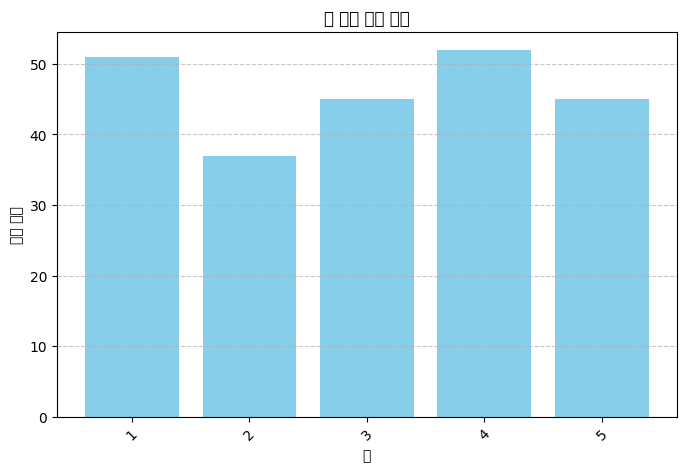

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 조의 출현 횟수 계산
counts = df['조'].value_counts().sort_index()

# 막대그래프 시각화
plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel('조')
plt.ylabel('출현 횟수')
plt.title('각 조의 출현 횟수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [74]:
# 마지막 행에서 6번째 자리의 숫자 추출
last_digit = df.iloc[-1]['6번째'] % 10  # 마지막 회차의 6번째 자리 끝자리

# 끝번호의 연속 비출현 주 수 추적
streak_count_last_digit = 0

for i in range(len(df)-2, -1, -1):  # 마지막 회차 전부터 거꾸로 확인
    current_digit = df.iloc[i]['6번째'] % 10
    if current_digit != last_digit:  # 같은 끝번호가 아니면 비출현
        streak_count_last_digit += 1
    else:  # 끝번호가 출현했으면 중단
        break

print(f"마지막 회차의 6번째  번호 {last_digit}번은 {streak_count_last_digit}주 연속으로 나오지 않았습니다.")

# 2. 6번째 컬럼에서 각 숫자가 최대 몇 주 연속 나오지 않았는지 계산

# 각 숫자(0~9)의 최대 비출현 주 수를 추적하는 딕셔너리
max_streak_count = {i: 0 for i in range(10)}
current_streak = {i: 0 for i in range(10)}

# 6번째 컬럼에서 비출현 주 수 계산
for index, row in df.iterrows():
    current_digit = row['6번째'] % 10  # 6번째 자리 끝자리 추출

    # 모든 끝번호에 대해 업데이트
    for digit in range(10):
        if digit != current_digit:  # 해당 번호가 이번 회차에 나오지 않았으면
            current_streak[digit] += 1  # 연속 비출현 주 수 증가
            # 최대 비출현 주 수 업데이트
            if current_streak[digit] > max_streak_count[digit]:
                max_streak_count[digit] = current_streak[digit]
        else:
            current_streak[digit] = 0  # 끝번호가 나오면 연속 비출현 수 초기화

# 결과 출력
for digit in range(10):
    print(f"끝번호 {digit}번은 최대 {max_streak_count[digit]}주 연속으로 나오지 않았습니다.")

마지막 회차의 6번째  번호 9번은 9주 연속으로 나오지 않았습니다.
끝번호 0번은 최대 50주 연속으로 나오지 않았습니다.
끝번호 1번은 최대 56주 연속으로 나오지 않았습니다.
끝번호 2번은 최대 27주 연속으로 나오지 않았습니다.
끝번호 3번은 최대 35주 연속으로 나오지 않았습니다.
끝번호 4번은 최대 43주 연속으로 나오지 않았습니다.
끝번호 5번은 최대 49주 연속으로 나오지 않았습니다.
끝번호 6번은 최대 26주 연속으로 나오지 않았습니다.
끝번호 7번은 최대 32주 연속으로 나오지 않았습니다.
끝번호 8번은 최대 26주 연속으로 나오지 않았습니다.
끝번호 9번은 최대 43주 연속으로 나오지 않았습니다.


- 프로젝트 개요 및 목적 : 연금복권 당첨 조,번호 크롤링 및 분석

- 데이터 수집 과정 설명 : 다음 웹페이지에서 연금복권 링크 적재 후 1등의 조, 번호를 따로 리스트에 저장 후 apppend 범위 (1~230회차 )

- 데이터 분석 방법 및 과정 : value_counts 함수로 1등 조 빈도 시각화, 막대그래프로 빈도 시각화

- 분석 결과 및 인사이트 : 1조,4조가 1등 당첨이 타 조에 비해 잘되며 마지막 번호는 1번과0번이 오랫동안 나오지 않았다.

- 시각화 자료
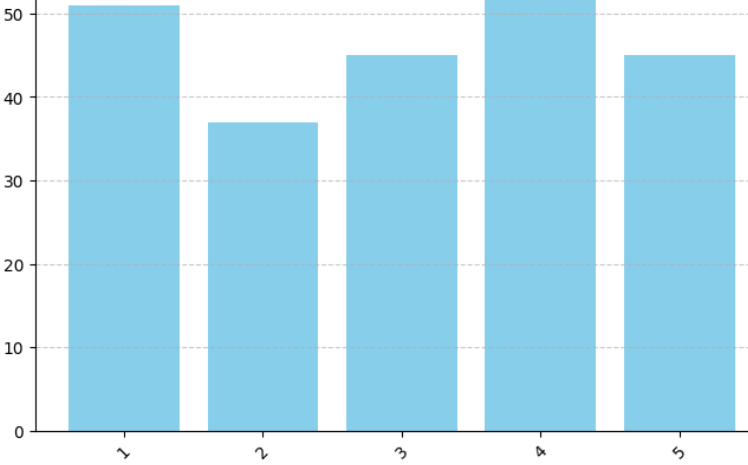

- 결론 및 느낀점 : 자동화 크롤링을 처음 접해 굉장히 유용하게 사용할 수 있을 것 같다.